In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
st = set(stopwords.words('english'))

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NewUser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/NewUser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [134]:
# read in data
df_eng = pd.read_csv('tutor_data.csv').drop(columns='Unnamed: 0')
#df_eng.drop_duplicates(inplace=True)

In [135]:
df_eng['bio_count'] = df_eng['bio'].apply(lambda x: len(str(x).split(" ")))
df_eng[['bio','bio_count']].head()

,bio,bio_count
0,I have tutored in Math for the past three year...,315
1,From finding probabilities and hypothesis test...,246
2,Hello Student!I'd like to help! Here is little...,310
3,"""But that's easy!"" is the response I hope...",282
4,I graduated from Oklahoma State with a degree ...,101


In [42]:
freq = pd.Series(' '.join(df_eng['bio']).split()).value_counts()[:20]
freq

and         19845
I           18494
to          13819
the         11899
a           11156
in          11024
of           8510
have         6245
my           5281
with         5218
for          5186
students     4689
as           3984
is           3405
that         3338
am           3013
you          2743
at           2737
math         2620
tutoring     2454
dtype: int64

In [136]:
%%time
#Create the corpus of bios

stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "one", "two", "new", "previously", "shown", 'math']
stop_words = stop_words.union(new_words)

corpus = []
for i in range(0, len(df_eng['bio'])):
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df_eng['bio'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # remove periods
    text = text.replace('.', '').replace(',' , '')
    
    #Convert to list from string
    text = text.split()
    
    ##Stemming
    stemmer=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    #text = [stemmer.stem(lem.lemmatize(word)) for word in text if not word in stop_words]
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    corpus.append(text)

CPU times: user 7.27 s, sys: 71.9 ms, total: 7.34 s
Wall time: 7.64 s


[Text(0, 0, 'student'),
 Text(0, 0, 'school'),
 Text(0, 0, 'tutoring'),
 Text(0, 0, 'year'),
 Text(0, 0, 'help'),
 Text(0, 0, 'teaching'),
 Text(0, 0, 'college'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'high'),
 Text(0, 0, 'tutor'),
 Text(0, 0, 'science'),
 Text(0, 0, 'subject'),
 Text(0, 0, 'algebra'),
 Text(0, 0, 'university'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'mathematics'),
 Text(0, 0, 'level'),
 Text(0, 0, 'work'),
 Text(0, 0, 'calculus'),
 Text(0, 0, 'physic')]

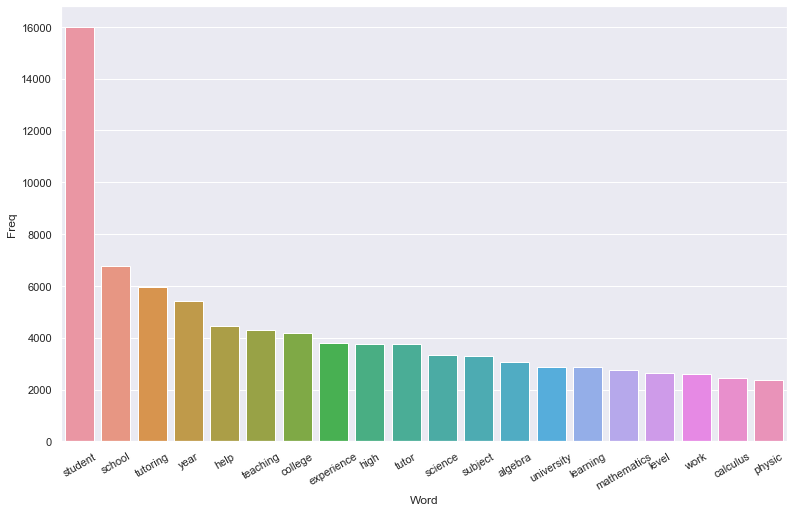

In [6]:
#Most frequently occuring words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'high school'),
 Text(0, 0, 'help student'),
 Text(0, 0, 'middle school'),
 Text(0, 0, 'helping student'),
 Text(0, 0, 'year experience'),
 Text(0, 0, 'look forward'),
 Text(0, 0, 'school college'),
 Text(0, 0, 'school student'),
 Text(0, 0, 'sat act'),
 Text(0, 0, 'college level'),
 Text(0, 0, 'experience tutoring'),
 Text(0, 0, 'algebra geometry'),
 Text(0, 0, 'master degree'),
 Text(0, 0, 'tutoring experience'),
 Text(0, 0, 'algebra algebra'),
 Text(0, 0, 'computer science'),
 Text(0, 0, 'working student'),
 Text(0, 0, 'feel free'),
 Text(0, 0, 'college student'),
 Text(0, 0, 'pre calculus')]

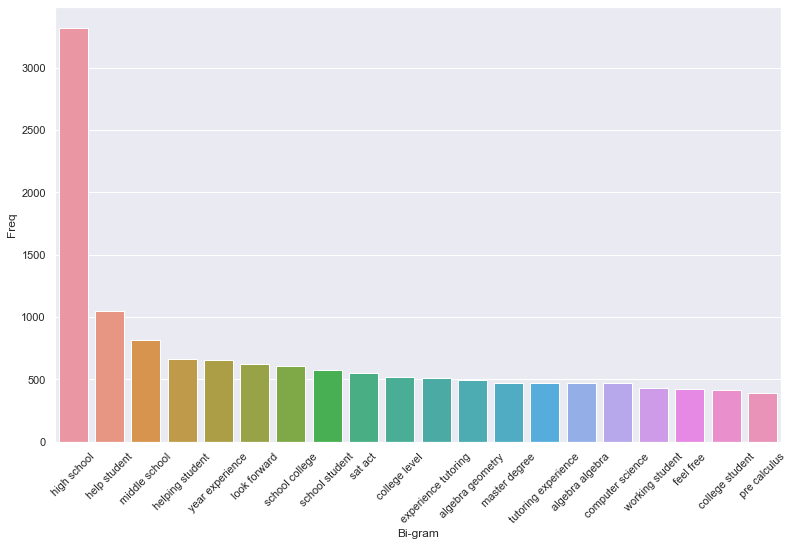

In [7]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'high school college'),
 Text(0, 0, 'high school student'),
 Text(0, 0, 'feel free contact'),
 Text(0, 0, 'school high school'),
 Text(0, 0, 'pre algebra algebra'),
 Text(0, 0, 'middle school high'),
 Text(0, 0, 'middle high school'),
 Text(0, 0, 'please feel free'),
 Text(0, 0, 'year experience tutoring'),
 Text(0, 0, 'look forward working'),
 Text(0, 0, 'high school level'),
 Text(0, 0, 'look forward hearing'),
 Text(0, 0, 'school college level'),
 Text(0, 0, 'algebra geometry trigonometry'),
 Text(0, 0, 'school college student'),
 Text(0, 0, 'year experience teaching'),
 Text(0, 0, 'year tutoring experience'),
 Text(0, 0, 'algebra algebra geometry'),
 Text(0, 0, 'pre calculus calculus'),
 Text(0, 0, 'free contact question')]

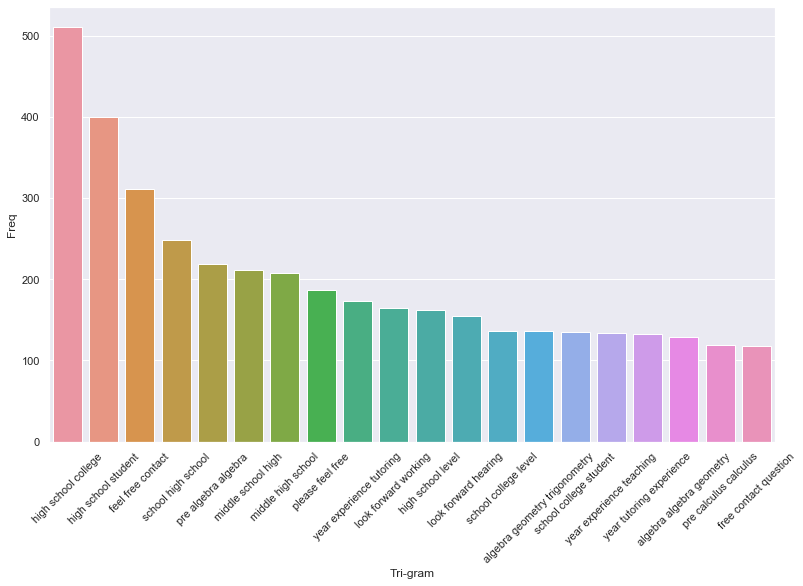

In [8]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [137]:
%%time
df_nlp = pd.DataFrame()
for i in range(4):
    vectorizer = TfidfVectorizer(ngram_range=(i,i), max_features=200)
    vectors = vectorizer.fit(corpus)
    vectors = vectors.transform(corpus)

    names = vectorizer.get_feature_names()
    data = vectors.todense().tolist()
    # Create a dataframe with the results
    temp_df = pd.DataFrame(data, columns=names)
    df_nlp = pd.concat([df_nlp, temp_df], axis=1)

CPU times: user 11.3 s, sys: 410 ms, total: 11.7 s
Wall time: 11.9 s


In [105]:
potential_list

['contact',
 'contact question',
 'experience',
 'enjoy',
 'help',
 'helping',
 'love',
 'success',
 'understand',
 'understanding',
 'every student',
 'experience teaching',
 'experience tutoring',
 'experience working',
 'feel free',
 'forward working',
 'free contact',
 'full time',
 'hello name',
 'help student',
 'helped student',
 'helping others',
 'helping student',
 'hi name',
 'look forward',
 'love help',
 'love teaching',
 'make sure',
 'many student',
 'many year',
 'need help',
 'please contact',
 'please feel',
 'solve problem',
 'student learn',
 'student learning',
 'student need',
 'student understand',
 'teaching experience',
 'teaching style',
 'teaching tutoring',
 'tutoring experience',
 'work student',
 'worked student',
 'working student',
 'would like',
 'would love',
 'year experience',
 'year teaching',
 'year tutoringachieve academic goal',
 'believe every student',
 'enjoy helping student',
 'enjoy working student',
 'experience teaching tutoring',
 'experi

In [138]:
experience_list = ['experience teaching tutoring', 'experience tutoring student', 'experience working student', 
                   'many student', 'many year', 
                   'year experience teaching', 'year experience tutoring',
                   'year experience working',
                   'year teaching experience', 'year tutoring experience']
                   
welcoming_list = ['look forward hearing', 'look forward helping', 'look forward meeting', 'look forward working',
                  'forward working', 'hello name', 'hi name', 'please contact', 'please feel',
                  'would like', 'would love', 'feel free contact', 'feel free reach', 'free contact question']
                  
goal_list = ['goal help student', 'achieve academic goal',  
             'help student succeed', 'helping student achieve']

passion_list = ['enjoy helping student', 'enjoy working student', 'look forward', 
                 'believe every student', 'love help', 'love teaching', 
                 'love helping student', 'love working student', 'would love help']

In [140]:
# basic cuts on targets
df_eng = df_eng.loc[df_eng[df_eng['hours_per_week_estimate'] < 20].index]
df_eng = df_eng.loc[df_eng[df_eng['hours_per_week_estimate'] > 0.5].index]
df_eng = df_eng.loc[df_eng[df_eng['rate'] <= 200].index]
df_eng = df_eng.loc[df_eng[df_eng['rate'] >= 10].index]

df_eng = df_eng.loc[df_eng[df_eng['hours_tutor'] <= 1000].index]

df_eng.reset_index(drop=True, inplace=True)

def normalize(df):
    return (df - df.min()) / (df.max()-df.min())

df_eng['experience_kw'] = normalize(df_nlp[experience_list].sum(axis=1))
df_eng['welcoming_kw'] = normalize(df_nlp[welcoming_list].sum(axis=1))
df_eng['goal_kw'] = normalize(df_nlp[goal_list].sum(axis=1))
df_eng['passion_kw'] = normalize(df_nlp[passion_list].sum(axis=1))

In [145]:
top_tutors = [np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['experience_kw'].head(500)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['welcoming_kw'].head(500)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['passion_kw'].head(500)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['bio_count'].head(500)).mean()] 
top_tutors

[0.07418984516200829, 0.11056885357801097, 0.06696853050919901, 260.414]

In [146]:
df_nlp_category = df_eng[['experience_kw','welcoming_kw', 'passion_kw']]
df_nlp_category.to_csv('tutor_nlp.csv', index=False)
df_nlp_category.describe()

,experience_kw,welcoming_kw,passion_kw
count,2517.000000,2517.000000,2517.000000
mean,0.078250,0.113162,0.062602
std,0.158378,0.183577,0.124955
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.105799,0.185691,0.095472
max,1.000000,0.976621,0.975892
